<a href="https://colab.research.google.com/github/Antikadas1/Antikadas1/blob/main/Indian_Premier_League_Data_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **INFORMATION ABOUT THE WHOLE NOTEBOOK -- DOMAIN KNOWLEDGE, OBJECTIVE**
This is a notebook based on kaggle data analysis project named "Indian Premier League (Cricket)".Link -> https://www.kaggle.com/manasgarg/ipl?select=matches.csv

##### ***Cricket*** :
cricket is a bat-and-ball game played between two teams of eleven players on a field at the centre of which is a 22-yard pitch with a wicket at each end, each comprising two bails balanced on three stumps.
Forms of cricket: 

* Test Cricket,
* One Day International Cricket 
* Twenty20 International Cricket
For more information -->https://www.icc-cricket.com/about/cricket/game-formats/the-three-formats#:~:text=The%20Three%20Formats%20of%20Cricket&text=Cricket%20is%20unique%20as%20a,work%20is%20explained%20right%20here.


##### ***Information about "Indian Premier League"***: 
Indian Premier Leagu(IPL) is a Twenty20 cricket tournement organized by the Board of Control for Cricket in India (BCCI) since 2007 contested by eight teams based out of eight different Indian cities. For more information --> https://en.wikipedia.org/wiki/Indian_Premier_League

##### ***Data Analysis Objective & Visualization*** :
In this project we will try to analyze the performace of each team every year along with player's personal acheivement in terms of runs,wickets, run chasing etc.
There are two csv files contains data from year 2008 to 2017.
1) matches.csv - contains information about whole match such as team names, total run , winning team etc.
2) deliveries.csv -- It contains all information about each over,wickets taken & run scored by players etc

This notebook is devided in 2 sections:


```
# SECTION1 : 
Analysis of only match.csv 
  1. Total number of matches held each year/season
  2. Number of matches won by each team each season
  3. Number of matches won by each team at their home ground *
  4. Which team won highest number of matches over the tournament each year.
  5. Does the highest number of winning matches team won the Final ** 
  6. Every season which player won the highest man of the match from each team¶
```

```
# SECTION2 : Each match analysis
Total run to be chased, scores of each player, wickets taken by bowlers, runs in each over etc.( match.csv+ deliveries.csv)
```




  
*The home ground analysis is incorrect as the name of the teams not always colides with city, and if you consider vanue, for different seasons the homegrounds were different for each team each season -->for information https://en.wikipedia.org/wiki/List_of_Indian_Premier_League_venues
I am working on optimized solution of homeground analysis





**for that we would need one extra information that is who is the winner of each year from 2007 to 2017




# Section1

In [ ]:
#Import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
import plotly.graph_objects as go
import warnings

warnings.simplefilter(action="ignore",category="Futurewarning")

In [ ]:
#mount google drive
from google.colab import drive
drive.mount("/content/MyDrive")


Mounted at /content/MyDrive


In [ ]:
#define the path of my data folder inside google drive
path="/content/MyDrive/MyDrive/Dataset"
match=pd.read_csv(os.path.join(path,'matches.csv'))
delivery=pd.read_csv(os.path.join(path,'deliveries.csv'))
indian_cities=pd.read_csv(os.path.join(path,"indian_cities.csv"))

In [ ]:
#get some information about match csv
#get column names 
col_list_match=list(match.columns)
print (len(col_list_match))
col_list_match
#col and rows info
match


18


,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
0,1,2017,Hyderabad,2017-04-05,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN
1,2,2017,Pune,2017-04-06,Mumbai Indians,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,0,Rising Pune Supergiant,0,7,SPD Smith,Maharashtra Cricket Association Stadium,A Nand Kishore,S Ravi,NaN
2,3,2017,Rajkot,2017-04-07,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Kolkata Knight Riders,0,10,CA Lynn,Saurashtra Cricket Association Stadium,Nitin Menon,CK Nandan,NaN
3,4,2017,Indore,2017-04-08,Rising Pune Supergiant,Kings XI Punjab,Kings XI Punjab,field,normal,0,Kings XI Punjab,0,6,GJ Maxwell,Holkar Cricket Stadium,AK Chaudhary,C Shamshuddin,NaN
4,5,2017,Bangalore,2017-04-08,Royal Challengers Bangalore,Delhi Daredevils,Royal Challengers Bangalore,bat,normal,0,Royal Challengers Bangalore,15,0,KM Jadhav,M Chinnaswamy Stadium,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
631,632,2016,Raipur,2016-05-22,Delhi Daredevils,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Royal Challengers Bangalore,0,6,V Kohli,Shaheed Veer Narayan Singh International Stadium,A Nand Kishore,BNJ Oxenford,NaN
632,633,2016,Bangalore,2016-05-24,Gujarat Lions,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Royal Challengers Bangalore,0,4,AB de Villiers,M Chinnaswamy Stadium,AK Chaudhary,HDPK Dharmasena,NaN
633,634,2016,Delhi,2016-05-25,Sunrisers Hyderabad,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Sunrisers Hyderabad,22,0,MC Henriques,Feroz Shah Kotla,M Erasmus,C Shamshuddin,NaN
634,635,2016,Delhi,2016-05-27,Gujarat Lions,Sunrisers Hyderabad,Sunrisers Hyderabad,field,normal,0,Sunrisers Hyderabad,0,4,DA Warner,Feroz Shah Kotla,M Erasmus,CK Nandan,NaN


In [ ]:
#PRE DATA PROCESSING
#create a dataframe  IPL Winners List from 2008-2017
ipl_final_winner=pd.DataFrame({"season":sorted(set(match["season"])),"winner Team":["Rajasthan Royals","Sunrisers Hyderabad","Chennai Super Kings","Chennai Super Kings","Kolkata Knight Riders","Mumbai Indians","Kolkata Knight Riders","Mumbai Indians","Sunrisers Hyderabad","Mumbai Indians"]})

#drop unnecessary cols
match["umpire3"].isnull().sum()
match=match.drop(columns=["umpire3","dl_applied"])
#there replace Rising Pune Supergiants with Rising Pune Supergiant as they both are same team but "s" is the entry error
match.replace("Rising Pune Supergiants","Rising Pune Supergiant",inplace=True)

# *** important note "Sunrisers Hyderabad" and "Deccan Chargers" are the same team only in season2 the name was different
#so for the purpose of smooth analysis I am replacing the the name "Deccan Chargers" with Sunrisers Hyderabad
#it will help to find out home ground.
match.replace("Deccan Chargers","Sunrisers Hyderabad",inplace=True)


[2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017]
season_name- 2008 : count of total matches : 58
season_name- 2009 : count of total matches : 57
season_name- 2010 : count of total matches : 60
season_name- 2011 : count of total matches : 73
season_name- 2012 : count of total matches : 74
season_name- 2013 : count of total matches : 76
season_name- 2014 : count of total matches : 60
season_name- 2015 : count of total matches : 59
season_name- 2016 : count of total matches : 60
season_name- 2017 : count of total matches : 59


<BarContainer object of 10 artists>

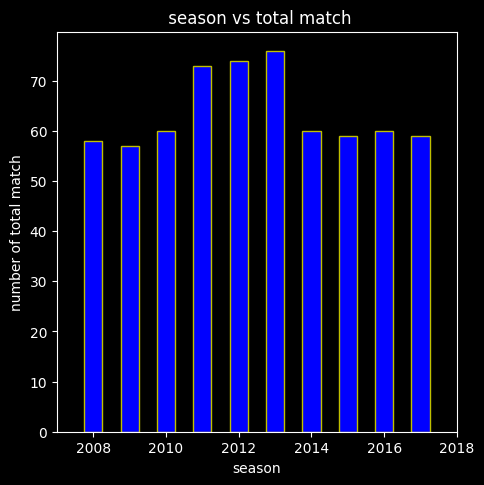

In [ ]:

# 1) Each year how many matches were held -- calculation

name_unique_season=sorted(set(match["season"]))
name_of_teams=sorted(set(match["team1"]))
print (name_unique_season)

count_of_total_matches=[]
for i in name_unique_season:
  count_of_total_matches.append((list(match["season"])).count(i))
  print ("season_name-",i,":","count of total matches :",(list(match["season"])).count(i))

# 1) Each year how many matches were held -- visualization

plt.style.available
plt.style.use('dark_background')
fig=plt.figure(figsize=(8,8),dpi=100)
axes=fig.add_axes([0.2,0.2,0.5,0.5])
axes.set_xlabel("season")
axes.set_ylabel("number of total match")
axes.set_title(" season vs total match")
axes.set_xlim(2007,2018)
axes.bar(name_unique_season,count_of_total_matches,color="blue",edgecolor="y",width=0.5)

In [ ]:
#Name of the all teams played ipl
print (name_of_teams)

['Chennai Super Kings', 'Delhi Daredevils', 'Gujarat Lions', 'Kings XI Punjab', 'Kochi Tuskers Kerala', 'Kolkata Knight Riders', 'Mumbai Indians', 'Pune Warriors', 'Rajasthan Royals', 'Rising Pune Supergiant', 'Royal Challengers Bangalore', 'Sunrisers Hyderabad']


In [ ]:

#Filter out the data for each season and check Number of matches won by each team
season1=match[match["season"]==2008]
season2=match[match["season"]==2009]
season3=match[match["season"]==2010]
season4=match[match["season"]==2011]
season5=match[match["season"]==2012]
season6=match[match["season"]==2013]
season7=match[match["season"]==2014]
season8=match[match["season"]==2015]
season9=match[match["season"]==2016]
season10=match[match["season"]==2017]
list_season=[season1,season2,season3,season4,season5,season6,season7,season8,season9,season10]

def max_matches_won(name_of_teams,list_season,*arg):
  season=[]
  team_name=[]
  max_win_count=[]
  team=""
  
  for s in list_season:
    max_win=0

    for name in name_of_teams:
      number_of_wins=list(s["winner"]).count(name)
      if number_of_wins>max_win:
        max_win=number_of_wins
        season_year=str(set(list(s["season"])))
        team=name
    season.append(season_year)
    team_name.append(team)
    max_win_count.append(max_win)
  return season,team_name,max_win_count

season,team_name,max_win_count=max_matches_won(name_of_teams,list_season)   
      

In [ ]:
#create a table to show each season maxmimum number of wins by team
fig=go.Figure(data=[go.Table(
    header=dict(values=['season', 'team','Highest winning match count',"season winner"],
                line_color='darkslategray',
                fill_color='lightskyblue',
                align='left'),
    cells=dict(values=[season, # 1st column
                       team_name,# 2nd column
                       max_win_count,
                       list(ipl_final_winner["winner Team"])], #3rd column

               line_color='darkslategray',
               fill_color='lightcyan',
               align='left'))
])

fig.update_layout(width=500, height=500)
fig.show()


In [ ]:
# indian_cities_names=list(indian_cities["City"])
# missing_city=[]
# #few cities are missing in indian city csv file which exists in match.csv we will add those cities in indian city list
# for city in set(list(match["city"])):
#   if city not in indian_cities_names:
#     missing_city.append(city)
#     # print (missing_city)

# # once you have the missing city list I removed the cities which were not part of india manuaaly
# missing_city=[
#  'Kolkata',
#  'Kanpur',
#  'Chandigarh',
#  'Visakhapatnam',
#  'Bangalore',
#  'Dharamsala',
#  'Durban',
#  'Nagpur']
 
# indian_cities_names.extend(missing_city)
# seasons_played_in_india=[]
# seasons_not_played_in_india=[]
# for season in list_season:
#   l=[]
#   for city in season["city"]:
#     if city in indian_cities_names:
#       l.append(city)
    
#   if len(l)==len(season):
#     print (list(season["season"])[0],"all the matches were played in india")
#     seasons_played_in_india.append(list(season["season"])[0])
#   else:
#     print (list(season["season"])[0],"all the matches were not played in india")

#     seasons_not_played_in_india.append(list(season["season"])[0])
# print (f"seasons played in india {seasons_played_in_india}")

In [ ]:
#seasons played in india [2008, 2010, 2011, 2012, 2013, 2015, 2016, 2017]
#replace the value with corresposding dataframe
seasons_played_in_india=[season1,season3,season4,season5,season6,season8,season9,season10]


In [ ]:
number_of_matches_won=[]
number_of_matches_won_in_home_ground=[]
team_name_list=[]

for teams in name_of_teams:
  c_win=0
  c_win_home_ground=0
  for i in range(len(season1["winner"])):
    # print (list(season1["winner"])[i])
    # print (teams)
    if teams==list(season1["winner"])[i]:
      c_win=c_win+1
      list_split=teams.split(" ")

      if list(season1["city"])[i] in list_split:
        c_win_home_ground=c_win_home_ground+1
  team_name_list.append(teams)
  number_of_matches_won_in_home_ground.append(c_win_home_ground)
  number_of_matches_won.append(c_win)

  
  home_ground_win_df=pd.DataFrame({"team name":team_name_list,"number of win":number_of_matches_won,"home ground win":number_of_matches_won_in_home_ground})
# ******************************************************************************************
### update ********** the home ground analysis is incorrect as the name of the teams not always
#colides with city, and if you consider vanue, for different seasons the homeground for different teams
#were different
#find the link here for information on homeground
# https://en.wikipedia.org/wiki/List_of_Indian_Premier_League_venues

# I am working on optimized solution of homeground analysis


In [ ]:
#pom=player of the match
def top_three_pom(season):
  count_man_of_the_match=[]
  player_name=[]
  for players in set(list(season["player_of_match"])):
    player_name.append(players)
    count_man_of_the_match.append(list(season["player_of_match"]).count(players))
  man_of_the_match=pd.DataFrame({"players name":player_name,"man of the match":count_man_of_the_match})
  man_of_the_match=man_of_the_match.sort_values("man of the match",ascending=False)
  # print (man_of_the_match.head(3))

  # top 3 man of the match
  fig=go.Figure(data=[go.Table(
      header=dict(values=["player name","man of the matches"],
                  line_color='darkslategray',
                  fill_color='yellow',
                  align='right'),
      cells=dict(values=[list(man_of_the_match["players name"])[:5], # 1st column
                        list(man_of_the_match["man of the match"])[:5],# 2nd column
                      ],
                line_color='black',
                fill_color='cyan',
                align='right'))
  ])

  fig.update_layout(width=300, height=400)
  fig.show()


In [ ]:
  print ("Highest man of the match of all seasons from 2007 to 2017")
  top_three_pom(match)

Highest man of the match of all seasons from 2007 to 2017


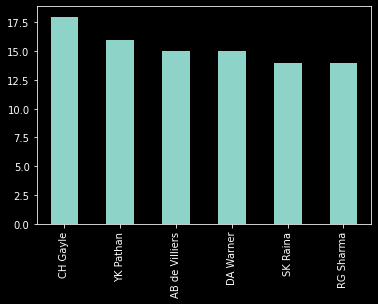

In [ ]:
#Bar graph for Highest man of the match of all seasons from 2007 to 2017
match['player_of_match'].value_counts()[:6].plot(kind = 'bar')


In [ ]:
for season in list_season:
  print ("Highest man of the match of each season :",list(season["season"])[0])
  top_three_pom(season)

Highest man of the match of each season : 2008


Highest man of the match of each season : 2009


Highest man of the match of each season : 2010


Highest man of the match of each season : 2011


Highest man of the match of each season : 2012


Highest man of the match of each season : 2013


Highest man of the match of each season : 2014


Highest man of the match of each season : 2015


Highest man of the match of each season : 2016


Highest man of the match of each season : 2017


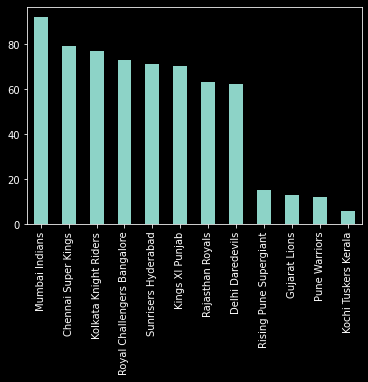

In [ ]:
# Total number of matches won by teams in 10 years
match["winner"].value_counts().plot(kind="bar")

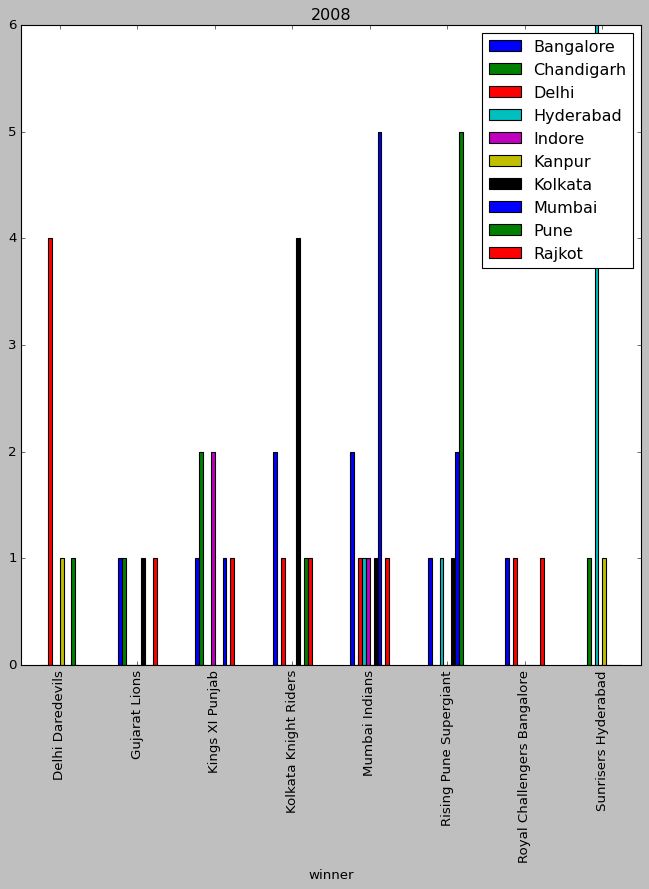

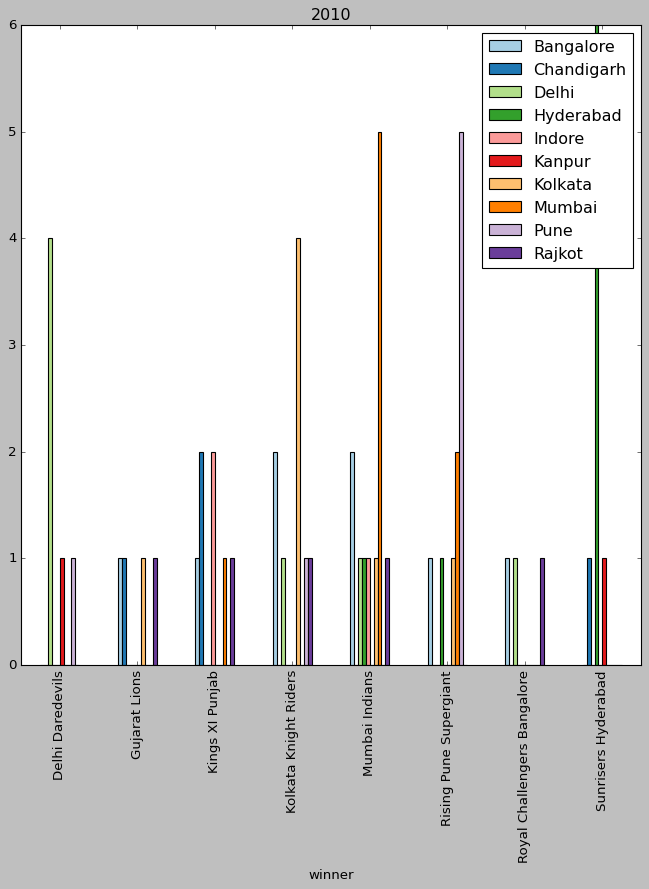

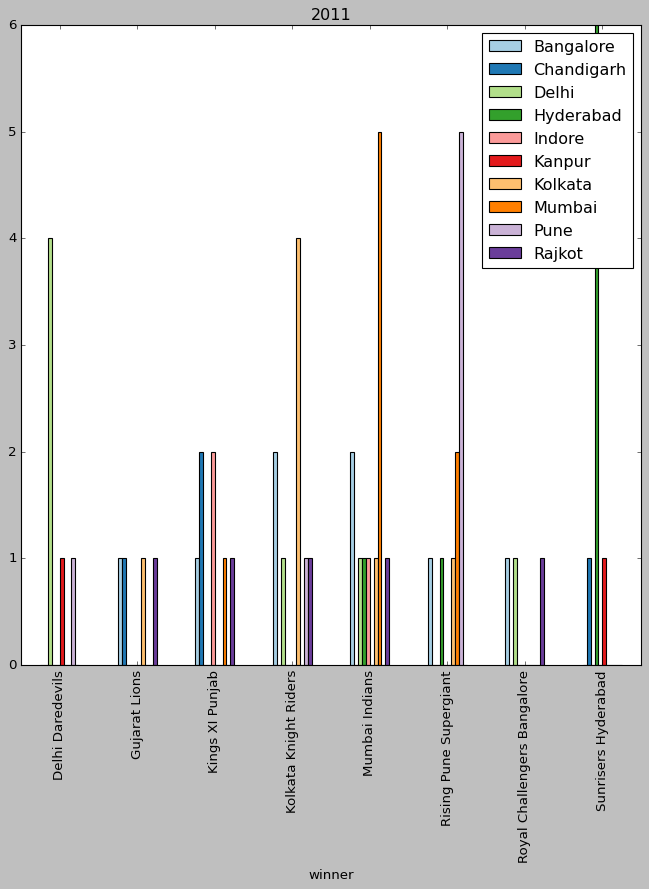

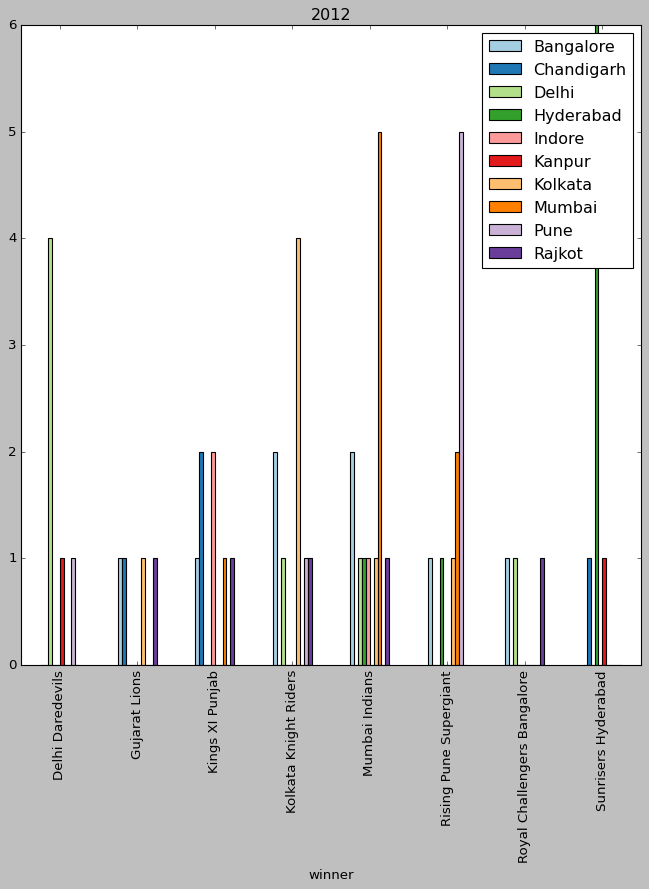

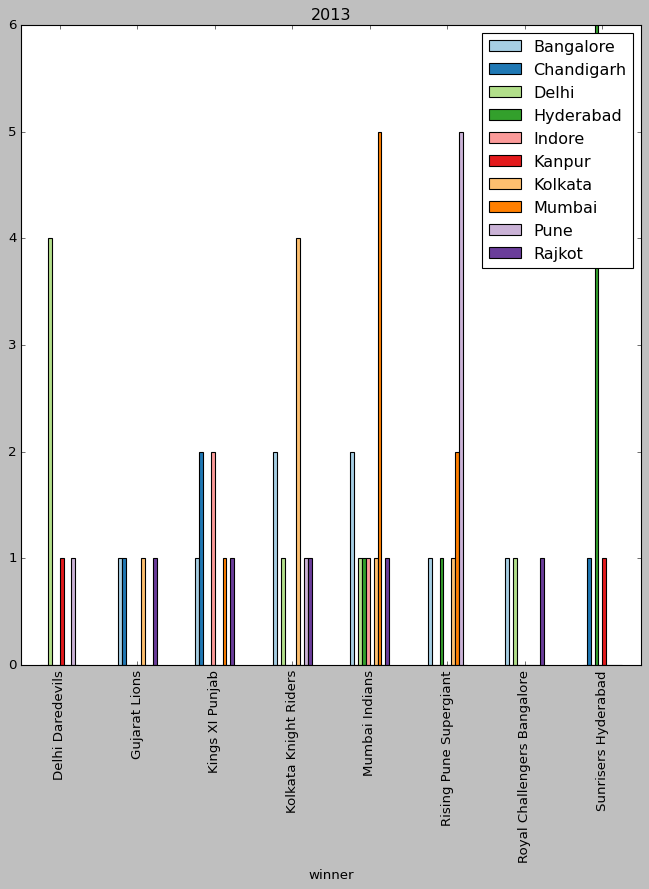

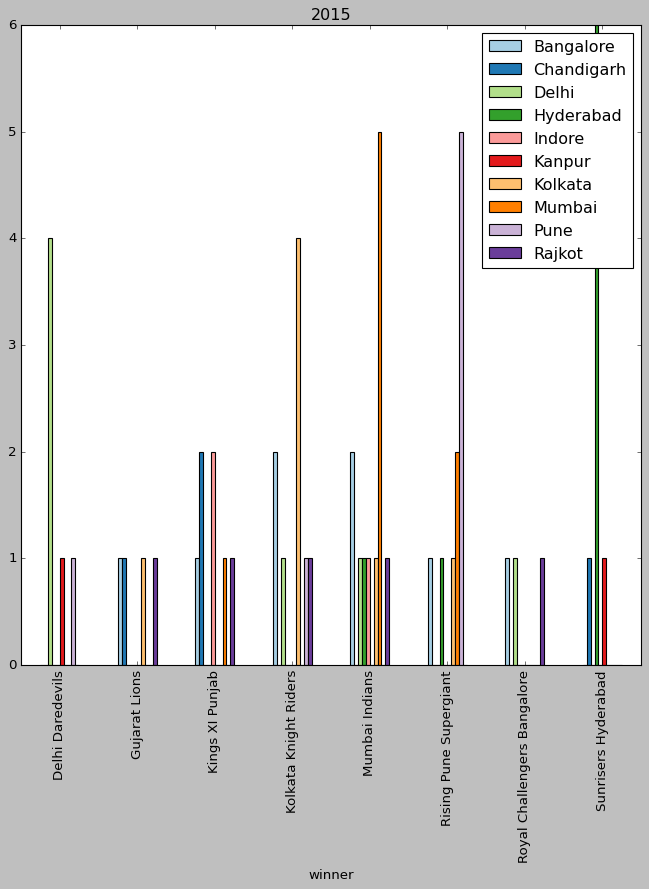

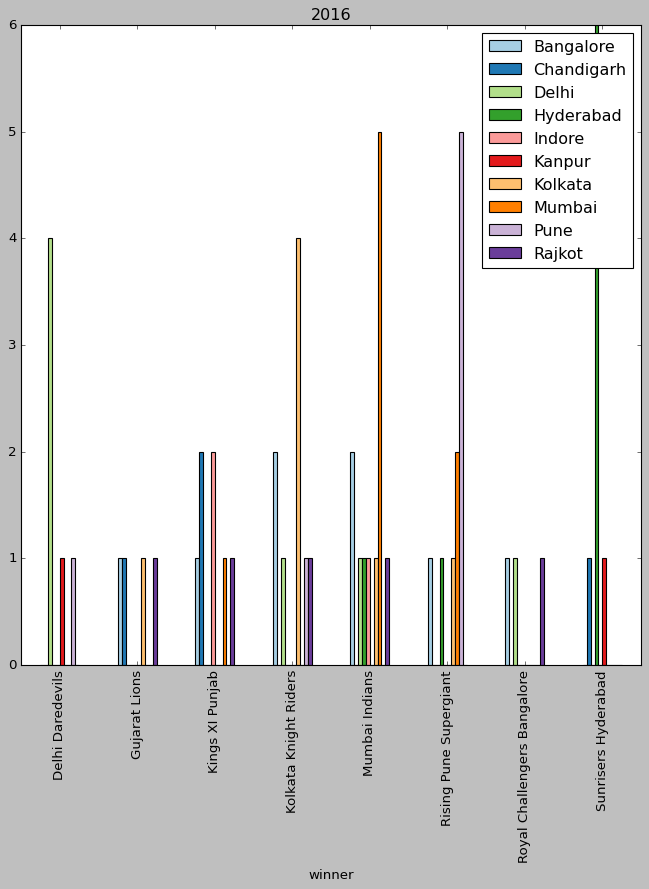

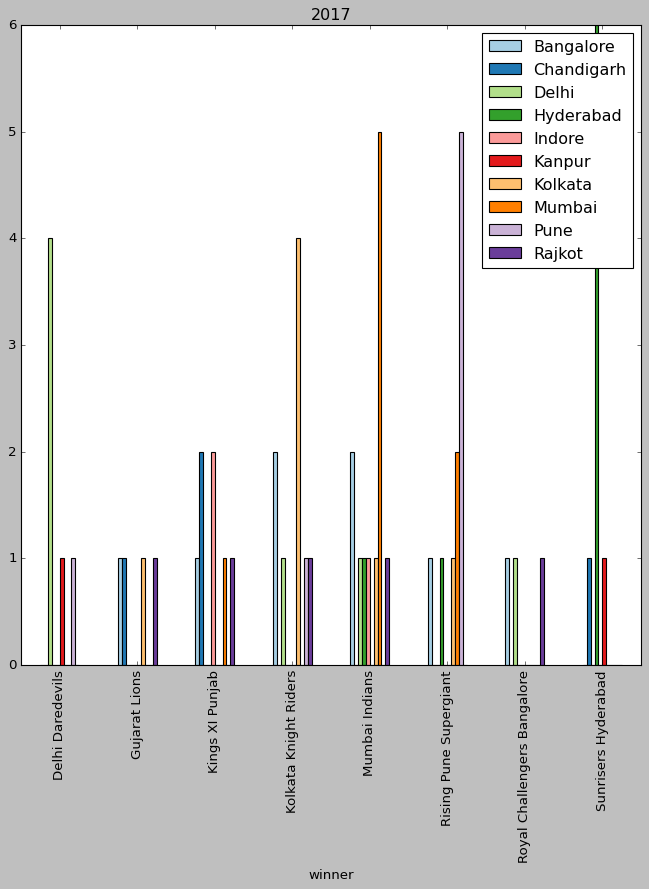

In [ ]:
# Number of wins by each team in each city of INDIA 
#(We do not consider matches played out of india in this analysis)

plt.style.use("classic")
stacked=False
for seasons in seasons_played_in_india:
  wins_each_city=season.groupby(["winner","city"])["season"].count().unstack()
  #bar with stack
  wins_each_city.plot(kind='bar', stacked=stacked, title=list(seasons["season"])[0], figsize=(10, 10))
  sns.set_palette("Paired", len(match['city'].unique()))
  plt.legend()



# Section 2
#### Combine both match and delivery data

In [ ]:
combined_data = match.merge(delivery, left_on='id', right_on='match_id')
combined_data.head(5)

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,wide_runs,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder
0,1,2017,Hyderabad,2017-04-05,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,1,DA Warner,S Dhawan,TS Mills,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN
1,1,2017,Hyderabad,2017-04-05,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,2,DA Warner,S Dhawan,TS Mills,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN
2,1,2017,Hyderabad,2017-04-05,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,3,DA Warner,S Dhawan,TS Mills,0,0,0,0,0,0,4,0,4,NaN,NaN,NaN
3,1,2017,Hyderabad,2017-04-05,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,4,DA Warner,S Dhawan,TS Mills,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN
4,1,2017,Hyderabad,2017-04-05,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,5,DA Warner,S Dhawan,TS Mills,0,2,0,0,0,0,0,2,2,NaN,NaN,NaN


In [ ]:
# each match analysis 

def individual_match_analysis(id):
  data_frame=combined_data[combined_data["id"]==id]
  team1=list(data_frame["team1"])[0]
  team2=list(data_frame["team2"])[0]
  winning_team=list(data_frame["winner"])[0]
  toss_wining_team=list(data_frame["toss_winner"])[0]
  toss_decision=list(data_frame["toss_decision"])[0]
  batting_team=list(data_frame["batting_team"])[0]

  team=team1 + " vs " + team2
  # run analysis
  win_by_run=list(data_frame["win_by_runs"])[0]
  win_by_wicket=list(data_frame["win_by_wickets"])[0]


  #INNINGS 1
  innings_1=data_frame[data_frame["inning"]==1]

    #BATSMAN

  batsman_indivisula_run_inng1=pd.DataFrame(innings_1.groupby(["batsman"]).sum()["batsman_runs"])
  total_run_to_be_chased_by_opponent=innings_1.groupby(["batsman"]).sum()["total_runs"].sum()
    #BOLWER AND OVERS
  number_of_overs_inn1=list((innings_1.groupby(["over"]).sum()).index)
  total_run_each_over_inn1=list(innings_1.groupby(["over"]).sum()["total_runs"])
  name_of_bolwers_each_over_inn1=[x[1] for x in (innings_1.groupby(["over","bowler"]).count()).index ]
  wickets_taken_inn1=list(innings_1.groupby(["over","bowler"]).count()["player_dismissed"])
  information_each_over_inn1=pd.DataFrame({"number_of_overs_inn1":number_of_overs_inn1,"total_run_each_over_inn1":total_run_each_over_inn1,"name_of_bolwers_each_over_inn1":name_of_bolwers_each_over_inn1,"wickets_taken_inn1":wickets_taken_inn1})

  #INNINGS 2
  innings_2=data_frame[data_frame["inning"]==2]

    #BATSMAN

  batsman_indivisula_run_inn2=pd.DataFrame(innings_2.groupby(["batsman"]).sum()["batsman_runs"])

    #BOWLER AND OVERS
  number_of_overs_inn2=list((innings_2.groupby(["over"]).sum()).index)
  total_run_each_over_inn2=list(innings_2.groupby(["over"]).sum()["total_runs"])
  name_of_bolwers_each_over_inn2=[x[1] for x in (innings_2.groupby(["over","bowler"]).count()).index ]
  wickets_taken_inn2=list(innings_2.groupby(["over","bowler"]).count()["player_dismissed"])

  information_each_over_inn2=pd.DataFrame({"number_of_overs_inn2":number_of_overs_inn2,"total_run_each_over_inn2":total_run_each_over_inn2,"name_of_bolwers_each_over_inn2":name_of_bolwers_each_over_inn2,"wickets_taken_inn2":wickets_taken_inn2})

  #OVERALL MATCH INFORMATION
  match_information=pd.DataFrame({"teams":[team],"winning_team":[winning_team],"toss_wining_team":[toss_wining_team],"toss_decision":[toss_decision],"chasing_run":[total_run_to_be_chased_by_opponent],"man_of_the_match":list(data_frame["player_of_match"])[0]})

  return match_information,batsman_indivisula_run_inng1,information_each_over_inn1,batsman_indivisula_run_inn2,information_each_over_inn2




In [ ]:
#call the function
#enter the match id you want to analyze
input_match_id=int(input("input the match id number you want to analyze"))
match_information,batsman_indivisula_run_inng1,information_each_over_inn1,batsman_indivisula_run_inn2,information_each_over_inn2=individual_match_analysis(input_match_id)
#Winner of the match
cm = sns.light_palette("blue", as_cmap=True)
match_information.style.background_gradient(cmap=cm).set_caption("OVERALL_MATCH_INFORMATION")

input the match id number you want to analyze 6


,teams,winning_team,toss_wining_team,toss_decision,chasing_run,man_of_the_match
0,Gujarat Lions vs Sunrisers Hyderabad,Sunrisers Hyderabad,Sunrisers Hyderabad,field,135,Rashid Khan


In [ ]:
#Winner of the match
cm = sns.light_palette("blue", as_cmap=True)
match_information.style.background_gradient(cmap=cm).set_caption("OVERALL_MATCH_INFORMATION")

,teams,winning_team,toss_wining_team,toss_decision,chasing_run,man_of_the_match
0,Gujarat Lions vs Sunrisers Hyderabad,Sunrisers Hyderabad,Sunrisers Hyderabad,field,135,Rashid Khan


INNINGS 1

In [ ]:
#Runs scored by each batsman on first innings of the match
cm = sns.light_palette("red", as_cmap=True)
batsman_indivisula_run_inng1.style.background_gradient(cmap=cm).set_caption(f"INNINGS _1").set_table_attributes("style='display:inline'")


,batsman_runs
batsman,
AJ Finch,3
BB McCullum,5
Basil Thampi,13
DR Smith,37
DS Kulkarni,1
JJ Roy,31
KD Karthik,30
P Kumar,7
SK Raina,5


In [ ]:
#Detailed information about overs,runs each over, wickets
cm = sns.light_palette("green", as_cmap=True)
information_each_over_inn1.style.background_gradient(cmap=cm).set_caption("INNINGS _1").set_table_attributes("style='display:inline'")


,number_of_overs_inn1,total_run_each_over_inn1,name_of_bolwers_each_over_inn1,wickets_taken_inn1
0,1,3,Bipul Sharma,0
1,2,10,B Kumar,0
2,3,12,Bipul Sharma,0
3,4,7,A Nehra,0
4,5,3,Rashid Khan,1
5,6,5,B Kumar,1
6,7,6,Rashid Khan,1
7,8,8,A Nehra,0
8,9,3,Rashid Khan,1
9,10,3,Bipul Sharma,0


INNINGS 2

In [ ]:
#Runs scored by each batsman on 2nd innings of the match

cm = sns.light_palette("blue", as_cmap=True)
batsman_indivisula_run_inn2.style.background_gradient(cmap=cm).set_caption(f"INNINGS _2").set_table_attributes("style='display:inline'")


,batsman_runs
batsman,
DA Warner,76
MC Henriques,52
S Dhawan,9


In [ ]:
#Detailed information about overs,runs each over, wickets
cm = sns.light_palette("yellow", as_cmap=True)
information_each_over_inn2.style.background_gradient(cmap=cm).set_caption("INNINGS _2").set_table_attributes("style='display:inline'")


,number_of_overs_inn2,total_run_each_over_inn2,name_of_bolwers_each_over_inn2,wickets_taken_inn2
0,1,3,SK Raina,0
1,2,8,P Kumar,0
2,3,21,SK Raina,0
3,4,8,P Kumar,1
4,5,8,Tejas Baroka,0
5,6,11,DS Kulkarni,0
6,7,8,S Kaushik,0
7,8,5,Tejas Baroka,0
8,9,4,S Kaushik,0
9,10,13,Basil Thampi,0


In [ ]:
# Total run scored by each player over the 10 years of IPL match
list_of_all_the_players=set(list(combined_data["batsman"]))
len(list_of_all_the_players)
name_of_player=[]
total_run_cumuliative=[]
for player in list_of_all_the_players:
  name_of_player.append(player)
  total_run_cumuliative.append(combined_data[combined_data["batsman"]==player]["batsman_runs"].sum())
player_individual_run=pd.DataFrame({"name_of_player":name_of_player,"total_run_cumuliative":total_run_cumuliative})


In [ ]:
player_individual_run.sort_values(by=['total_run_cumuliative'],ascending=False)

,name_of_player,total_run_cumuliative
252,SK Raina,4548
21,V Kohli,4423
18,RG Sharma,4207
315,G Gambhir,4132
66,DA Warner,4014
...,...,...
102,S Kaushik,0
366,V Pratap Singh,0
228,Sunny Gupta,0
251,C Nanda,0


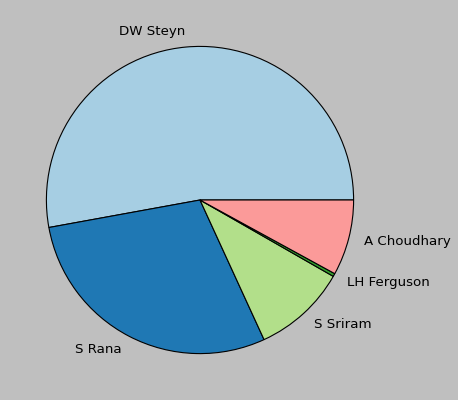

In [ ]:
total_run_cumuliative = list(player_individual_run["total_run_cumuliative"][0:5])
name_of_player =list(player_individual_run["name_of_player"][0:5])
plt.pie(total_run_cumuliative, labels = name_of_player)
plt.show() 